# Project Roadmap

### 1. Project Objectives
### 2. Setup / Import Libraries
### 3. Preprocessing
### 4. Eploratory Data Analysis
### 5. Model Development & Evaluation

# 1. Project Objectives
### This project focuses on estimating car prices based on a dataset containing features such as engine specifications, dimensions, and safety ratings. The goal of this project is to develop predictive models that can accurately estimate the price of different car types. The performance of each model will be evaluated using standard metrics, including Mean Squared Error (MSE) and R-squared (R²), to determine their accuracy and precision. Ultimately, the project aims to identify the most effective modeling approach for car price prediction.

# 2. Setup / Import Libraries

In [453]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder # препроцесинг для Многомерный полином (Multivariate Polynomial function)
# Label Encoder зачем нужен?


# Эти 2 штуки нужны для pipelайнов
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score # это для mean_squared_error

# Эти 3 строки я хз зачем, но пускай будут
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

# Module 5 - Refinement
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# libraries for plotting
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

# для Ridge Regression
from sklearn.linear_model import Ridge

# для Grid Search
from sklearn.model_selection import GridSearchCV

Note: you may need to restart the kernel to use updated packages.


# 3. Preprocessing

## 3.1 Load Data

In [454]:
df = pd.read_csv("C:/Main Folder/Data analysis/Datasets for practice/automobile.csv")
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 3.2 Take a look at our data

In [455]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [456]:
df.shape

(205, 27)

In [457]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## 3.3 Clean / transform data

#### Drop the 'Unnamed: 0'. That makes no sense

In [458]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [459]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Handling missing and incorrect values

In [460]:
(df=='').sum().sum()

0

In [461]:
df.isnull().sum().sum()

0

In [462]:
(df == '?').sum().sum()

59

In [463]:
df.replace('?', np.NaN, inplace = True)

In [464]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Drop entries where price is empty. We can't work with it 

In [465]:
df.dropna(subset = ['price'], axis = 0, inplace = True)

#### lets see what other columns with missing values represent

In [466]:
df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']].head()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
0,NaN,two,3.47,2.68,111,5000
1,NaN,two,3.47,2.68,111,5000
2,NaN,two,2.68,3.47,154,5000
3,164,four,3.19,3.40,102,5500
4,164,four,3.19,3.40,115,5500


In [467]:
df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']].dtypes

normalized-losses    object
num-of-doors         object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
dtype: object

#### lets convert object types to float except num-of-doors 

In [468]:
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].astype('float')

#### Now we can handle NaN values. We replace them with the mean

In [469]:
for n in df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].columns:
    mean_n = df[n].mean()
    df[n] = df[n].fillna(mean_n)

#### 'num-of-doors' is a categorical data. Let’s take a closer look at it

In [470]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

#### This column has only 2 unique values. We'll convert it to integers and fill missing values with the most frequent one

In [471]:
df['num-of-doors'].replace({'two' : 2, 'four' : 4}, inplace = True)

In [472]:
df['num-of-doors'].value_counts().idxmax() # 4 is a frequent one, replace with it

4.0

In [473]:
df['num-of-doors'] = df['num-of-doors'].fillna(4)

In [474]:
df['num-of-doors'].isnull().sum()

0

In [475]:
df.isnull().sum().sum() # isnull() is empty

0

### Let’s examine the data types to ensure everything is in order.

In [476]:
print('float types.', len(df.select_dtypes(include = ['float']).columns), 'columns: ', (df.select_dtypes(include = ['float']).columns).tolist())
print('int types:', len(df.select_dtypes(include = ['int']).columns), 'columns: ', (df.select_dtypes(include = ['int']).columns).tolist())
print('object types:', len(df.select_dtypes(include = ['object']).columns), 'columns: ', (df.select_dtypes(include = ['object']).columns).tolist())

float types. 11 columns:  ['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm']
int types: 5 columns:  ['symboling', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']
object types: 10 columns:  ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'price']


#### Convert 'price' column to integer

In [477]:
df['price'] = df['price'].astype('int')

### We can use only numeric values, so let's see what object data are and how to work with them

In [478]:
object_types = list(df.select_dtypes(include = ['object']).columns)
for n in object_types:
    print('Column name:', n, '\b. Number of Unique Values -> ', df[n].nunique(), '\n')

Column name: make. Number of Unique Values ->  22 

Column name: fuel-type. Number of Unique Values ->  2 

Column name: aspiration. Number of Unique Values ->  2 

Column name: body-style. Number of Unique Values ->  5 

Column name: drive-wheels. Number of Unique Values ->  3 

Column name: engine-location. Number of Unique Values ->  2 

Column name: engine-type. Number of Unique Values ->  6 

Column name: num-of-cylinders. Number of Unique Values ->  7 

Column name: fuel-system. Number of Unique Values ->  8 



### Deal with dummies except "make"

In [479]:
df_with_dummies = pd.get_dummies(df, columns=['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], drop_first=True)

In [480]:
df_with_dummies.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'fuel-type_gas', 'aspiration_turbo',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_2bbl',
       'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [481]:
df_with_dummies.shape[1]

45

# 4. Exploratory Data Analysis

## 4.1 Distribution of Numerical Features

In [482]:
numerical_features = list(df.select_dtypes(include = ['number']).columns)
numerical_features

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

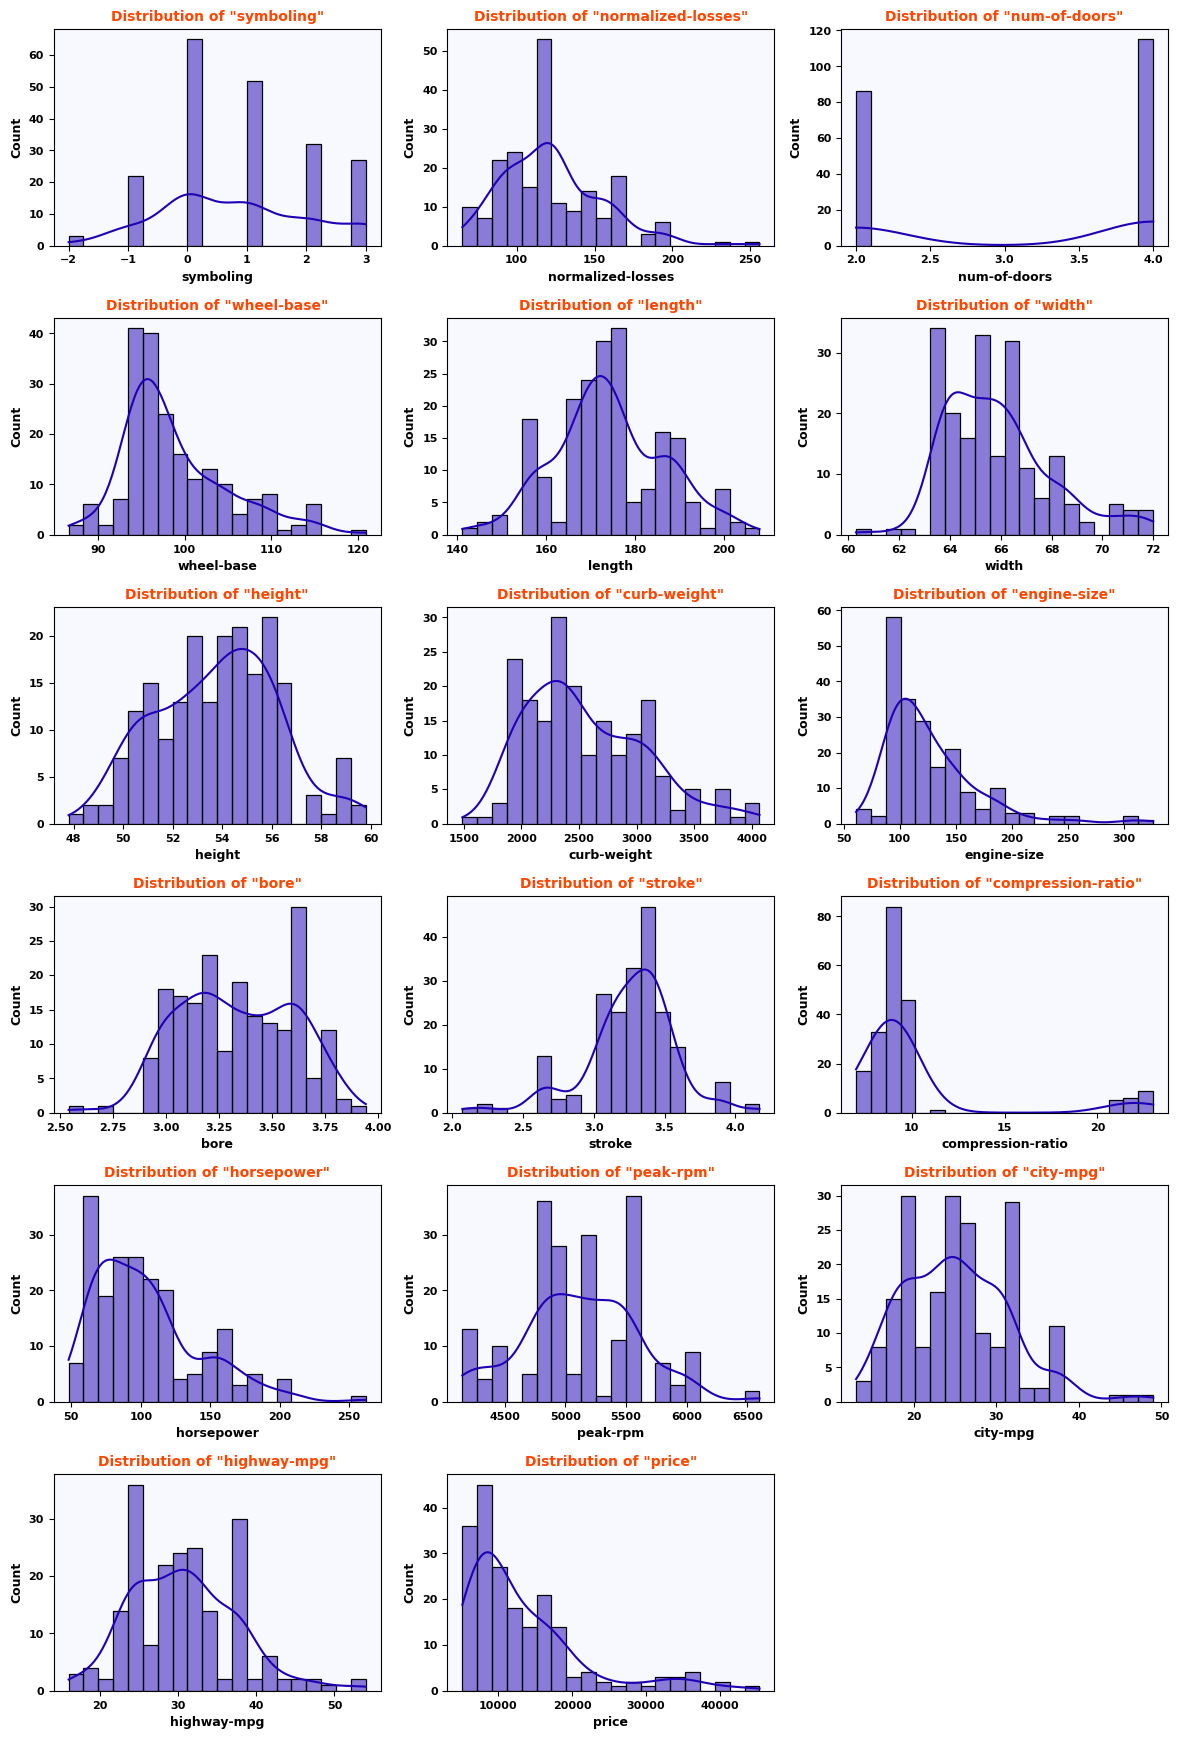

In [483]:
plt.figure(figsize=(12, 20))
for feature in numerical_features:
    plt.subplot(7, 3, numerical_features.index(feature) + 1)
    ax0 = sns.histplot(
        data=df[feature],
        bins=20, kde=True, 
        color = '#1f00b4', 
        edgecolor = 'black' 
    )
    
    plt.title(f'Distribution of "{feature}"', fontsize=10, fontweight='bold', color='#ff4500')
    plt.xlabel(feature, fontsize = 9, fontweight='bold', color = 'black')
    plt.ylabel('Count', fontsize = 9, fontweight='bold', color = 'black')
    plt.xticks(fontsize=8, fontweight='bold', color = 'black')
    plt.yticks(fontsize=8, fontweight='bold', color = 'black')
    ax0.set_facecolor('#F8F8FF') 
plt.tight_layout()
plt.show()

### Let's take a closer look at price Distribution

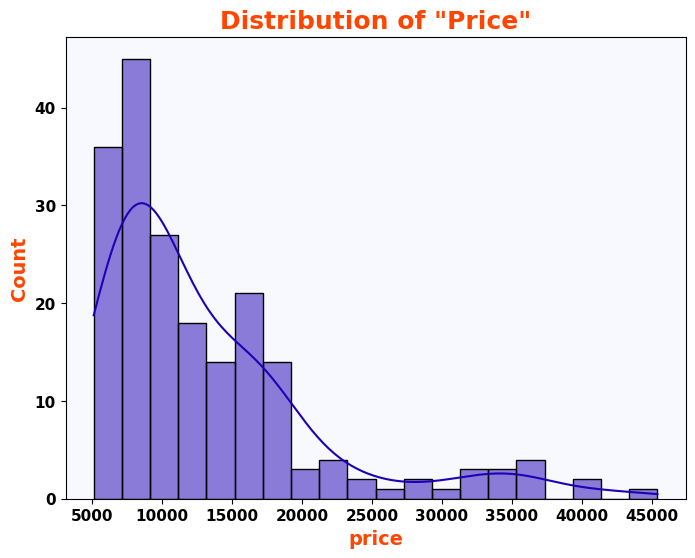

In [484]:
plt.figure(figsize=(8, 6))
ax2 = sns.histplot(data = df['price'], bins=20, kde=True, color = '#1f00b4', edgecolor = 'black', line_kws={'color': 'green'})
plt.xlabel('Price', fontsize = 16)
ax2.set_facecolor('#F8F8FF') 
plt.title('Distribution of "Price"', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.xlabel('price', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Count', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
plt.show()

## 4.2 Distribution of Categorical Columns

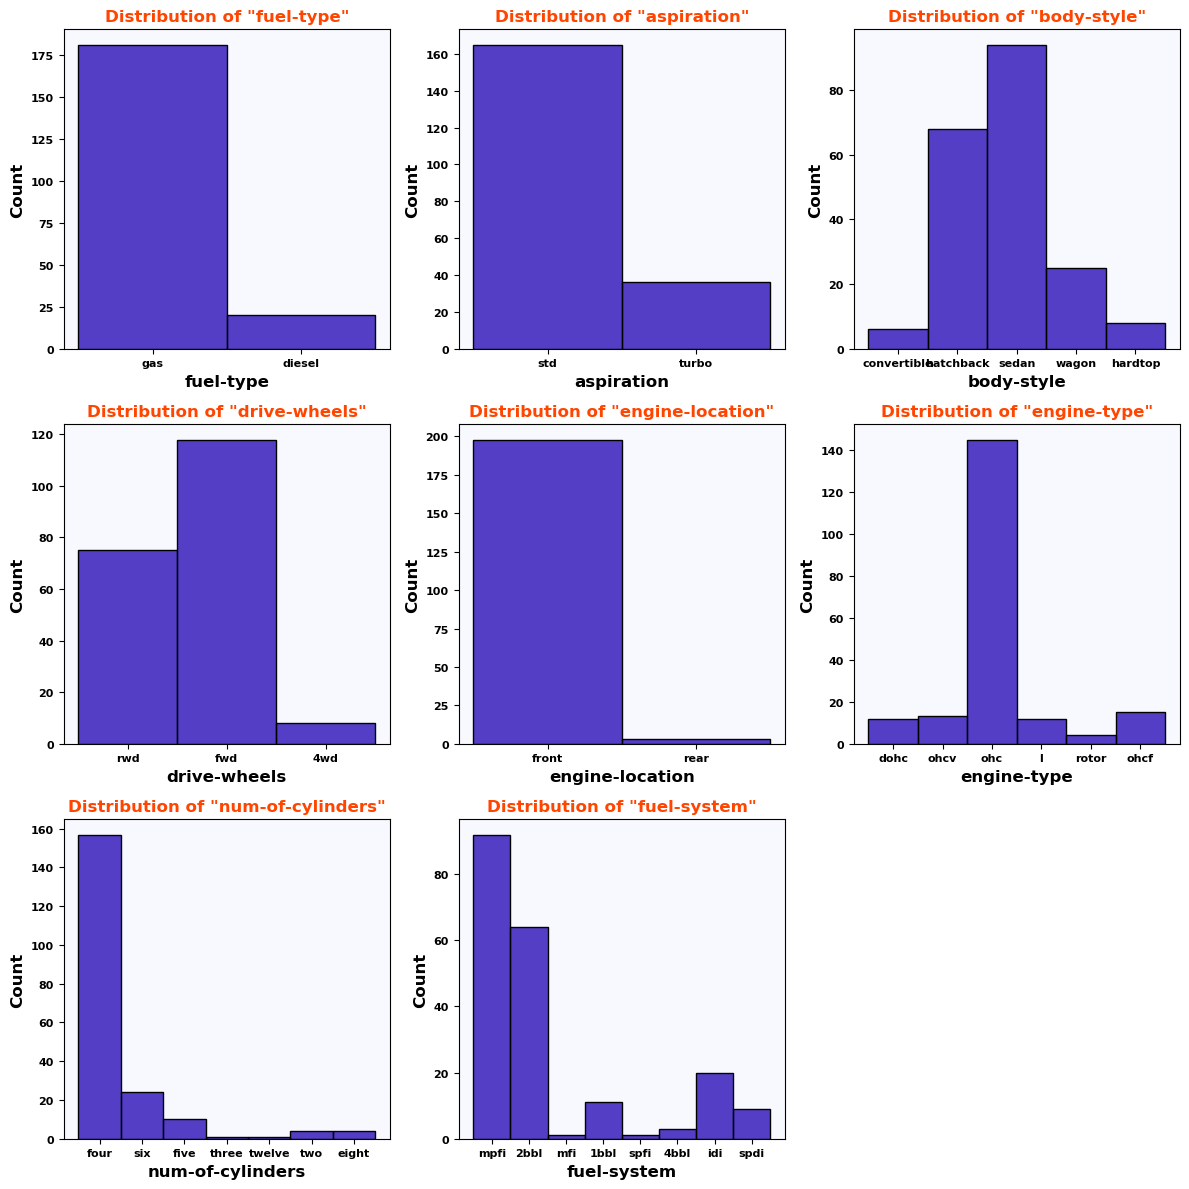

In [485]:
categorical_columns = list(df.select_dtypes(include=['object']).columns.drop('make'))
plt.figure(figsize=(12, 12))
for column in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(column) + 1)
    ax3 = sns.histplot(data=df[column], bins=20, kde=False, color = '#1f00b4', edgecolor = 'black')
    plt.title(f'Distribution of "{column}"', fontsize=12, fontweight='bold', color='#ff4500')
    plt.xlabel(column, fontsize = 12, fontweight='bold', color = 'black')
    plt.ylabel('Count', fontsize = 12, fontweight='bold', color = 'black')
    plt.xticks(fontsize=8, fontweight='bold', color = 'black')
    plt.yticks(fontsize=8, fontweight='bold', color = 'black')
    ax3.set_facecolor('#F8F8FF')
plt.tight_layout()
plt.show()

## 4.3 Distribution of Car makes

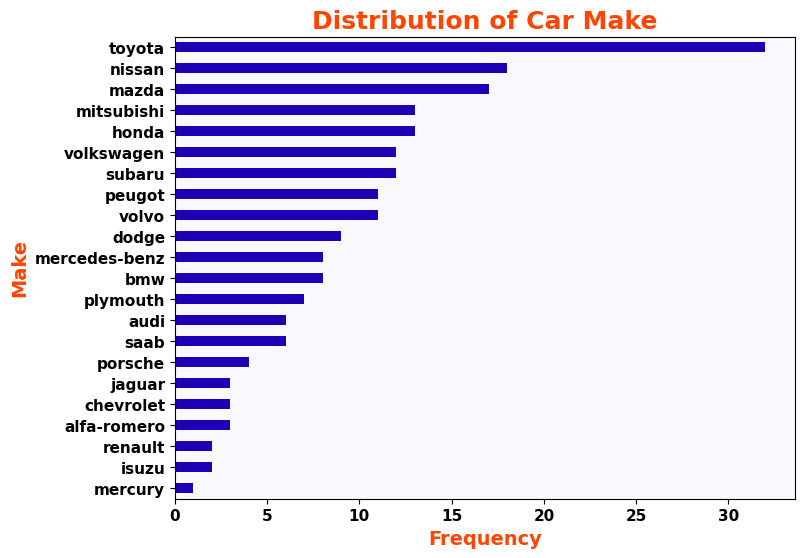

In [486]:
top_car_models = df['make'].value_counts()

plt.figure(figsize=(8, 6))
#plt.figure(facecolor='w')
ax = top_car_models.sort_values(ascending=True).plot(kind = 'barh', color = '#1f00b4')
ax.set_facecolor('#F8F8FF') 
plt.title('Distribution of Car Make', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.xlabel('Frequency', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Make', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
plt.show()

## 4.4 Average Price By Car Make

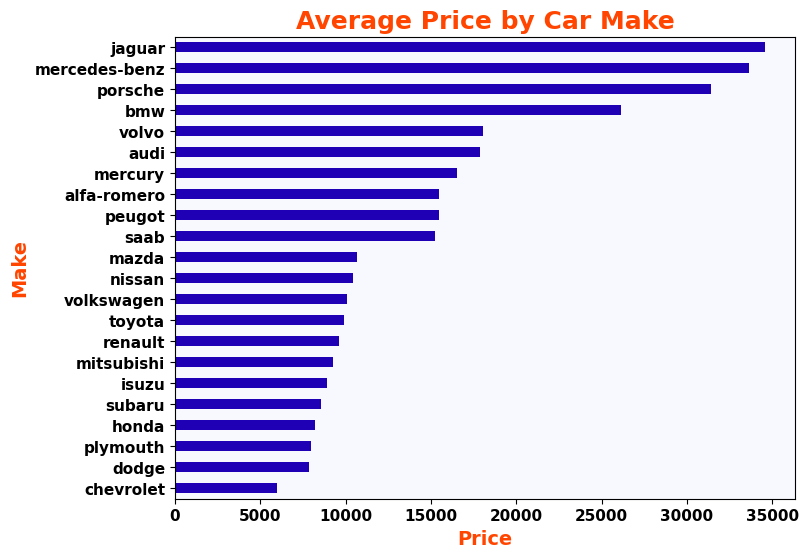

In [487]:
df_group_makes_price = df.groupby('make')['price'].mean().sort_values(ascending = True)

plt.figure(figsize=(8, 6))

ax1 = df_group_makes_price.plot(kind = 'barh', color = '#1f00b4')
plt.title('Average Price by Car Make', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.xlabel('Price', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Make', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax1.set_facecolor('#F8F8FF') 
plt.show()

## 4.3 Categorical Features and Price

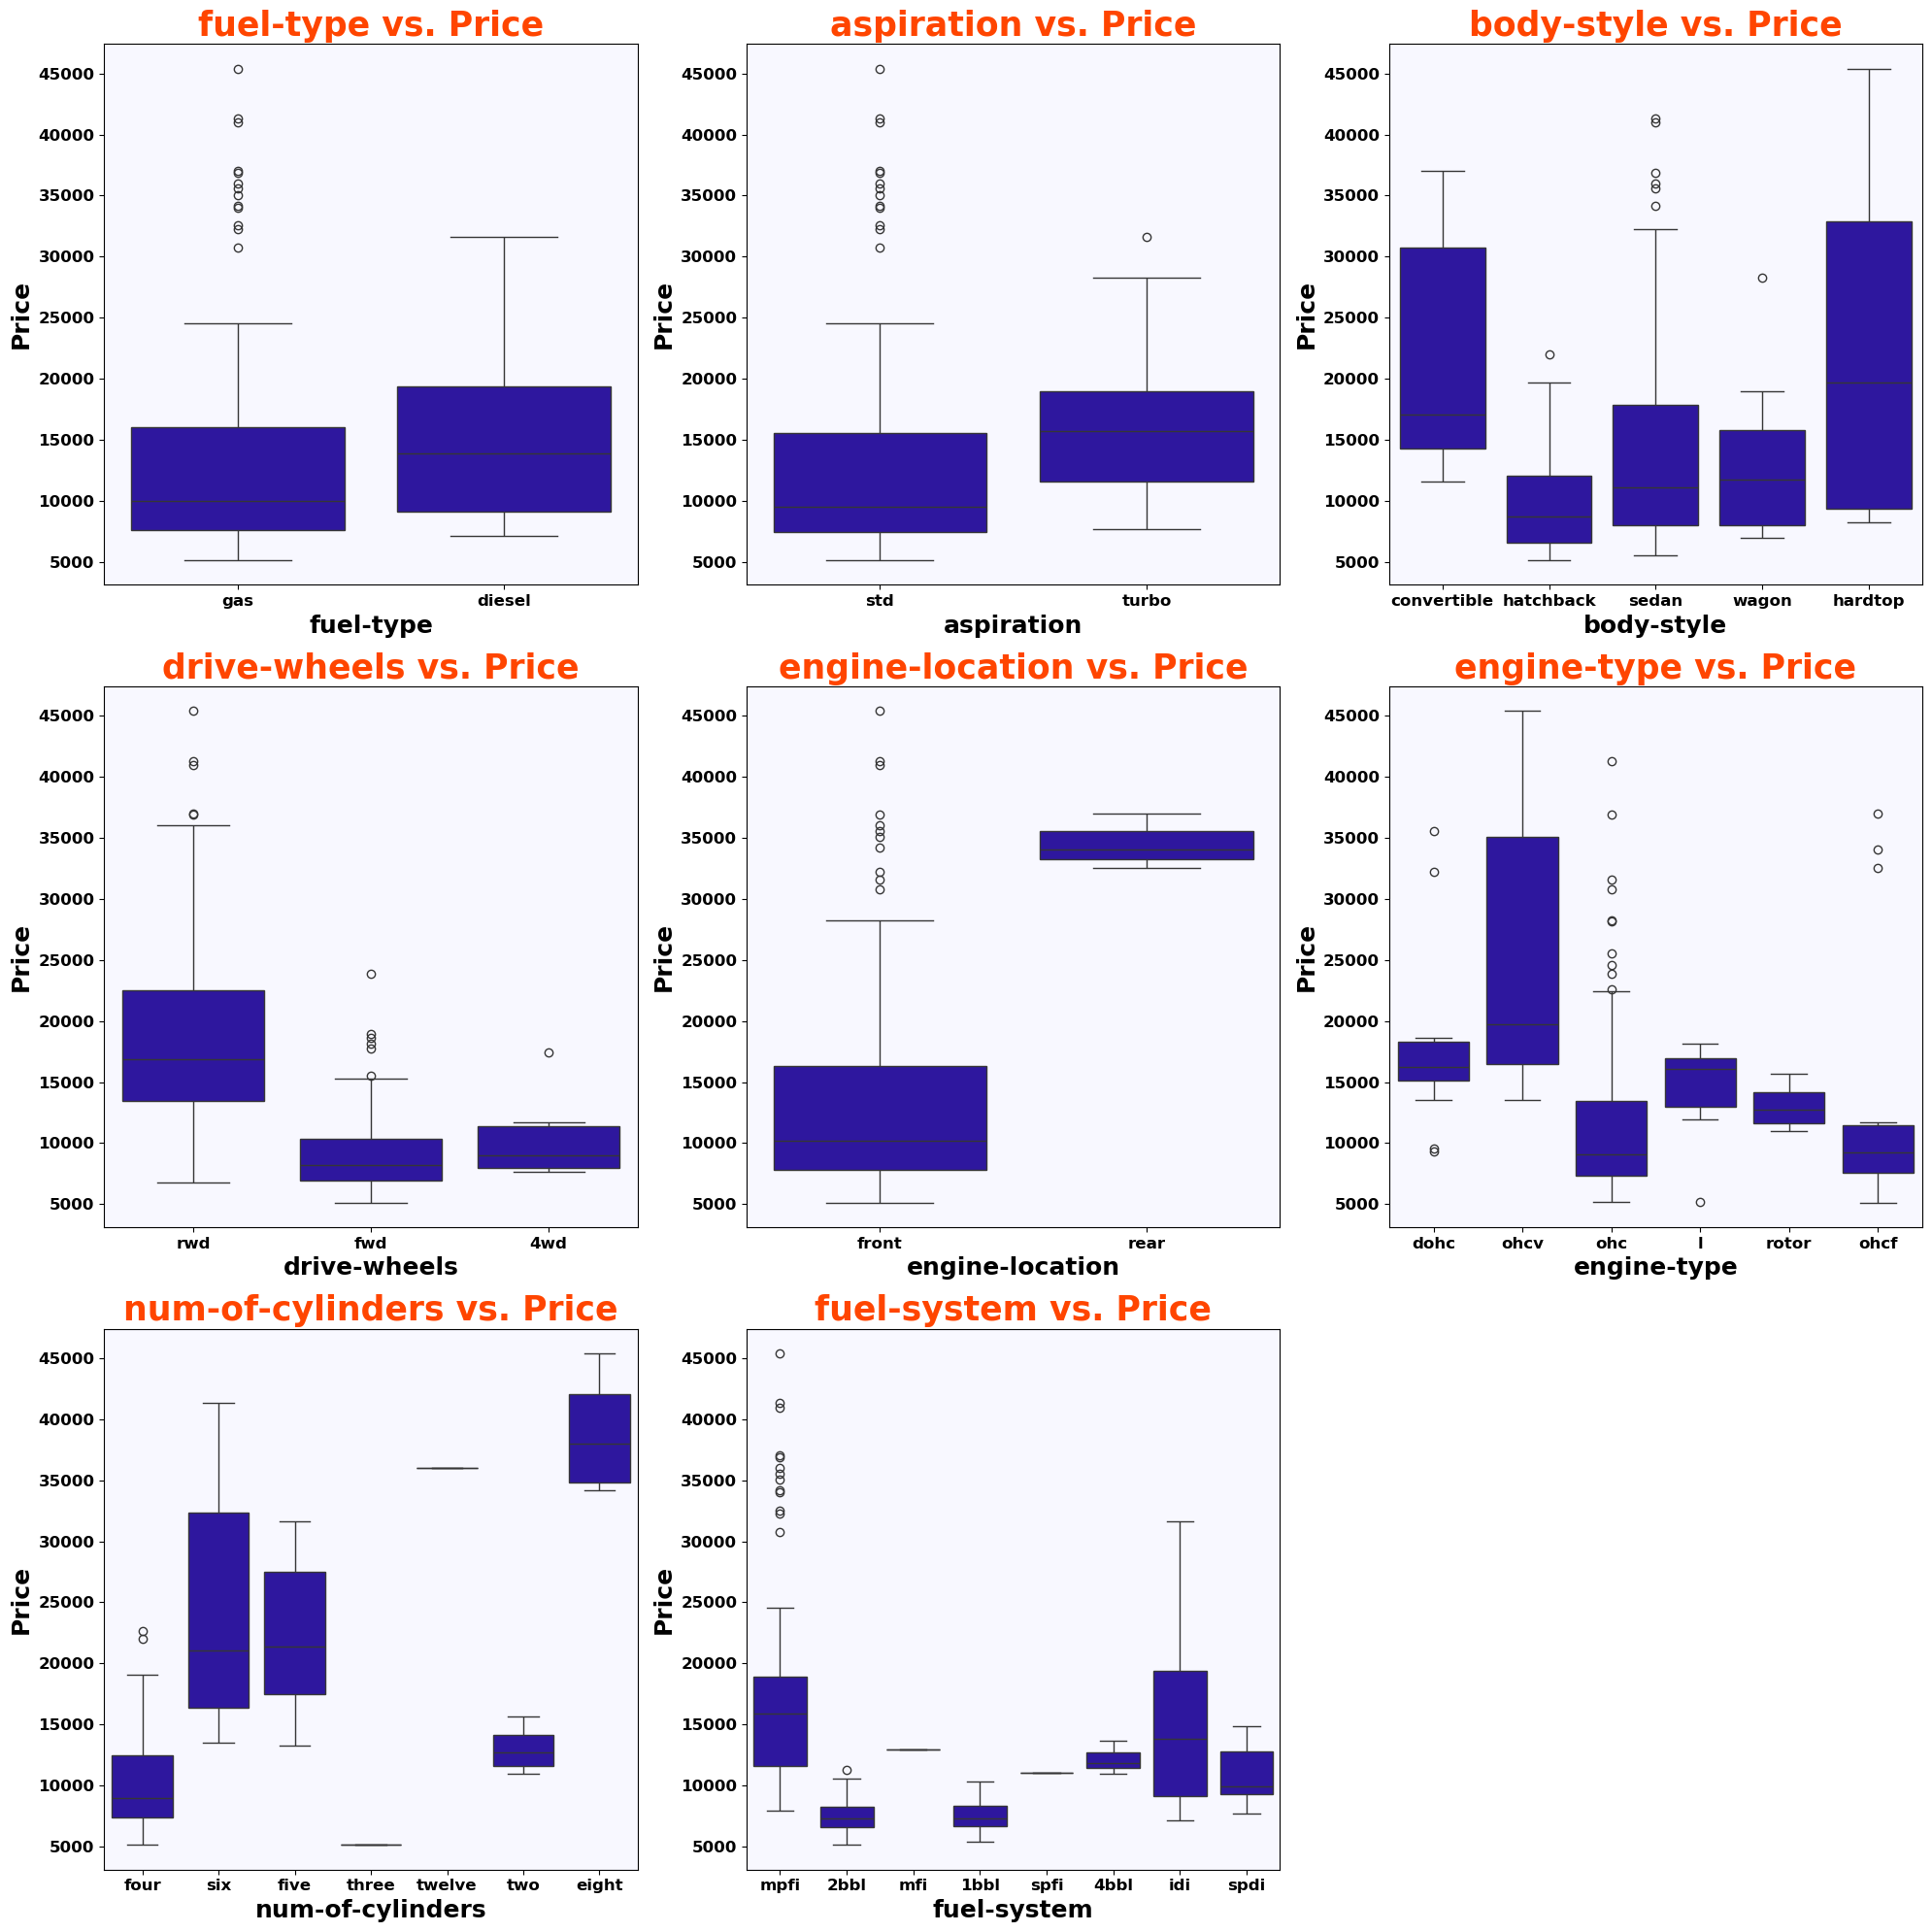

In [488]:
plt.figure(figsize=(20, 20))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    ax4 = sns.boxplot(data=df, x=feature, y='price', color = '#1f00b4')
    ax4.set_facecolor('#F8F8FF') 
    plt.title(f'{feature} vs. Price', fontsize = 25, fontweight='bold', color = '#ff4500')
    plt.xlabel(feature, fontsize = 18, fontweight='bold', color = 'black')
    plt.ylabel('Price', fontsize = 18, fontweight='bold', color = 'black')
    plt.yticks(fontsize=12, fontweight='bold', color = 'black')
    plt.xticks(fontsize=12, fontweight='bold', color = 'black')
plt.tight_layout()
plt.show()

## 4.4 Correlation Analysis

In [489]:
corr_df = df.select_dtypes(include='number').corr()

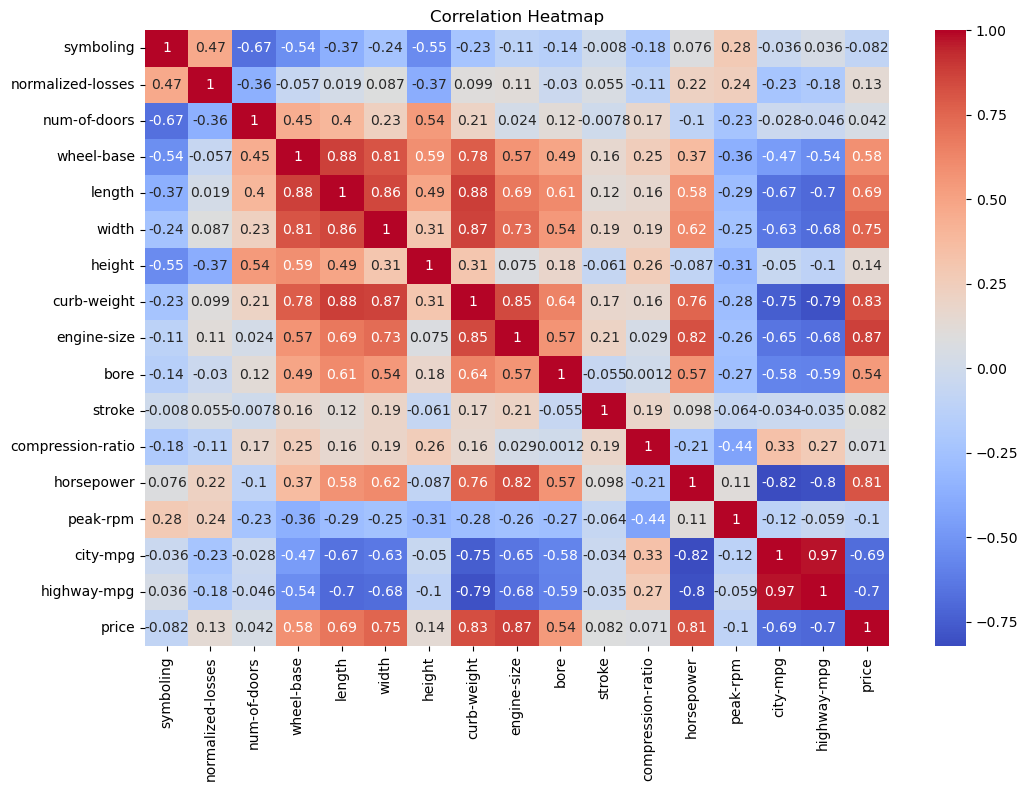

In [490]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

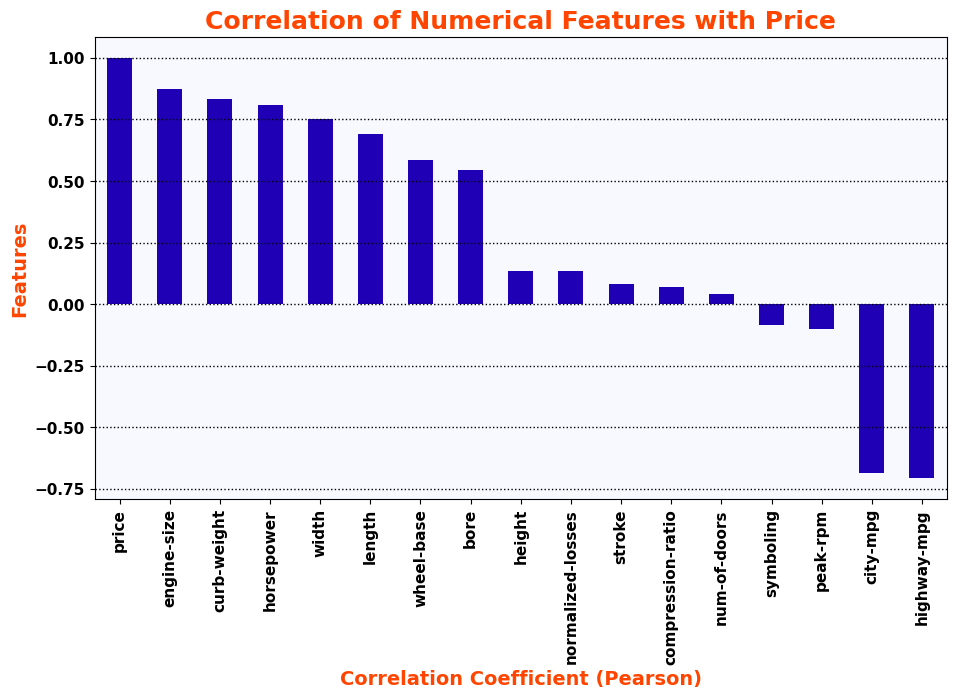

In [491]:
plt.figure(figsize = (8, 6))

ax5 = corr_df['price'].sort_values(ascending = False).plot(kind = 'bar', color = '#1f00b4', figsize=(11, 6))

ax5.grid(True, axis='y', linewidth=1, linestyle=':', color = 'black')
plt.title('Correlation of Numerical Features with Price', fontsize = 18, fontweight = 'bold', color = '#ff4500')
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Features', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax5.set_facecolor('#F8F8FF') 
plt.show()

In [492]:
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201.000000,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,NaN,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,NaN,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,NaN,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,3.144279,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,0.992008,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


## 4.5 Analysis Results

### Car Prices 

#### - Average Price = 13207$

#### - Median Price = 10295$

#### - Min Price = 5118$

#### - Max Price = 45400$




Most using car working in Gas around 90% and the average price less than the car working in Diesel. 😨😨
some category using the car working in Diesel around 10%, but the average price is more than the car working on Gas. 💥💥

Most cars stand around 82%, also the average price less for Turbo, with turbo cars comprising around 18%. 😪😪

Approximately 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors; sports cars maintain a similar average price. 👍👍

Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices. 👍👍

Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.

The most common engine type is "ohc," correlating with lower prices.

When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders.
As the engine size increases, so does the price.
The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact

# 5. Model Development

## 5.1. Linear Regression with Multiple features

In [493]:
z = df.select_dtypes(include = ['float', 'int']).drop('price', axis=1)
y = df['price']

In [494]:
lm = LinearRegression()

In [495]:
lm.fit(z, y)

LinearRegression()

In [496]:
y_pred = lm.predict(z)
y_pred[0:10]

array([12968.74488929, 12968.74488929, 17967.64158866, 11846.79325681,
       15830.8028735 , 15516.91815423, 18386.02991009, 18801.77232342,
       18901.29374267, 13052.03886276])

In [497]:
lm.score(z, y)

0.8503331838656125

In [498]:
residuals1 = y - y_pred

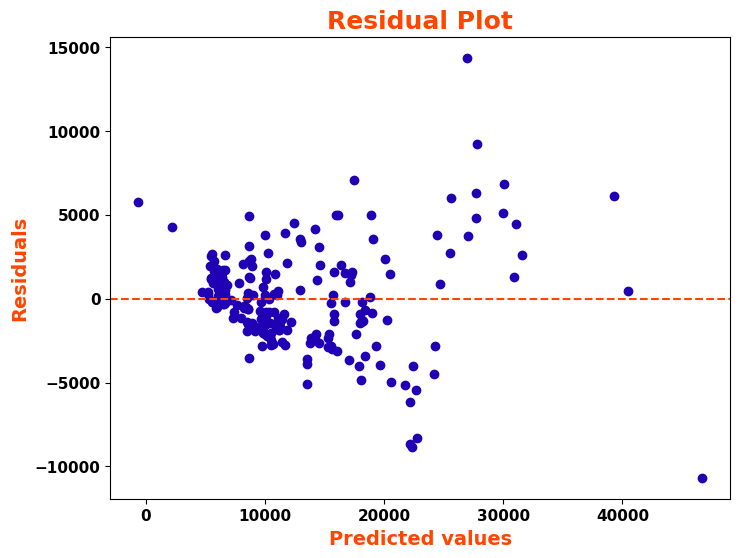

In [499]:
plt.figure(figsize=(8, 6))

ax6 = plt.scatter(y_pred, residuals1, color = '#1f00b4')
plt.title('Residual Plot', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.axhline(y=0, color='#ff4500', linestyle='--')
plt.xlabel('Predicted values', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Residuals', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax6.set_facecolor('#1f00b4') 
plt.show()

# 5.2. Train/Test Split

In [500]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state = 1)

In [501]:
lm = LinearRegression()

In [502]:
lm.fit(x_train, y_train)

LinearRegression()

In [503]:
yhat_test = lm.predict(x_test)

In [504]:
lm.score(x_test, y_test)

0.7802424860782048

In [505]:
lm.score(x_train, y_train)

0.8592854491937665

In [506]:
residuals = y_test - yhat_test

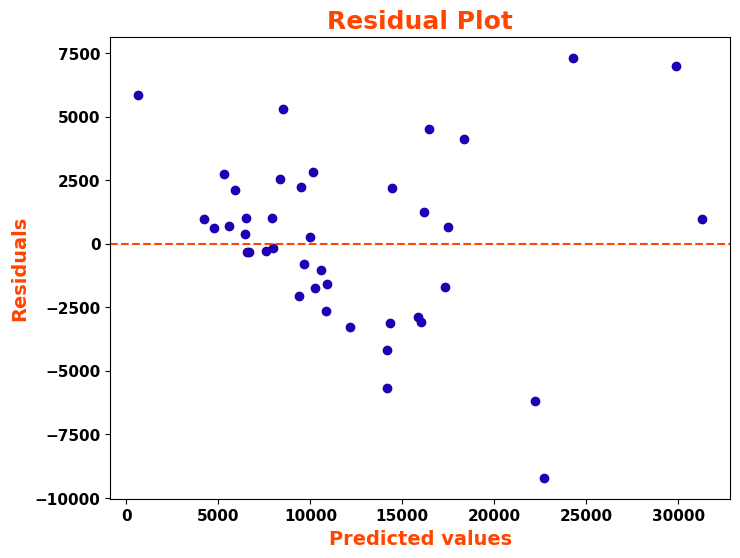

In [507]:
plt.figure(figsize=(8, 6))

ax6 = plt.scatter(yhat_test, residuals, color = '#1f00b4')
plt.title('Residual Plot', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.axhline(y=0, color='#ff4500', linestyle='--')
plt.xlabel('Predicted values', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Residuals', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax6.set_facecolor('#1f00b4') 
plt.show()

In [508]:
mse = mean_squared_error(y_test, yhat_test)
r2_square = r2_score(y_test, yhat_test)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')


 R-squared: 0.7802424860782048
Mean Squared Error: 11646225.444548206


In [509]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yhat_test,'Difference':y_test-yhat_test})
pred_df

,Actual Value,Predicted Value,Difference
100,9549,10575.101438,-1026.101438
120,6229,6551.187037,-322.187037
62,10245,9974.042704,270.957296
36,7295,9361.761523,-2066.761523
169,9989,14154.814385,-4165.814385
151,6338,6664.845951,-326.845951
29,12964,15827.336284,-2863.336284
81,8499,10244.778951,-1745.778951
4,17450,16203.521507,1246.478493
19,6295,5578.691280,716.308720


# Final Results

## Model Performance

## Rejoice, for the R2 Score shines at an impressive 78.0%